/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anac

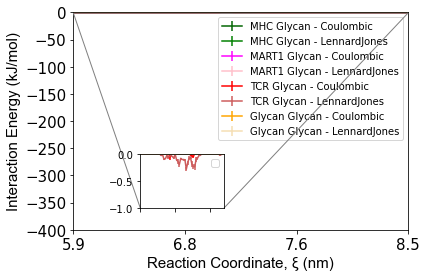

In [5]:
# Import IEx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

df = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/iex.xlsx')
df2 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/iex.xlsx')
df3 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/iex.xlsx')

df4 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/iex.xlsx')
df5 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/iex.xlsx')
df6 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/iex.xlsx')


#Combine Data

df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)

df4 = df4.append(df5, ignore_index=True)
df4 = df4.append(df6, ignore_index=True)




#Bin IE for Distance
bins=np.linspace(5.884,14.612,200).tolist()
gMHCc = df.groupby(pd.cut(df['COM Distance'], bins=bins))['MHC_Glycans_Coulombic'].agg(['mean','sem','size'])
gMHClj = df.groupby(pd.cut(df['COM Distance'], bins=bins))['MHC_Glycans_LennardJones'].agg(['mean','sem','size'])
gpepc = df.groupby(pd.cut(df['COM Distance'], bins=bins))['Peptide_Glycans_Coulombic'].agg(['mean','sem','size'])
gpeplj = df.groupby(pd.cut(df['COM Distance'], bins=bins))['Peptide_Glycans_LennardJones'].agg(['mean','sem','size'])
tcrc = df.groupby(pd.cut(df['COM Distance'], bins=bins))['TCR_Glycan_Coulombic'].agg(['mean','sem','size'])
tcrlj = df.groupby(pd.cut(df['COM Distance'], bins=bins))['TCR_Glycan_LennardJones'].agg(['mean','sem','size'])
glycc = df.groupby(pd.cut(df['COM Distance'], bins=bins))['Glycan_Glycan_Coulombic'].agg(['mean','sem','size'])
glyclj = df.groupby(pd.cut(df['COM Distance'], bins=bins))['Glycan_Glycan_LennardJones'].agg(['mean','sem','size'])


ax = plt.gca()
gMHCc.plot(kind='line', y='mean',yerr='sem', color='darkgreen', ax=ax)
gMHClj.plot(kind='line',y='mean',yerr='sem', color='green', ax=ax)
gpepc.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax)
gpeplj.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax)
tcrc.plot(kind='line', y='mean',yerr='sem', color='red', ax=ax)
tcrlj.plot(kind='line',y='mean',yerr='sem', color='indianred', ax=ax)
glycc.plot(kind='line', y='mean',yerr='sem', color='orange', ax=ax)
glyclj.plot(kind='line',y='mean',yerr='sem', color='wheat', ax=ax)

ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 15)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 15)
xticks=bins[::20]
xticks=np.around(xticks,1)
plt.xticks(range(0,len(gMHCc),20), xticks,fontsize=15)
plt.yticks(fontsize=15)
ax.legend(['MHC Glycan - Coulombic','MHC Glycan - LennardJones',
           'MART1 Glycan - Coulombic','MART1 Glycan - LennardJones',
         'TCR Glycan - Coulombic','TCR Glycan - LennardJones',
         'Glycan Glycan - Coulombic','Glycan Glycan - LennardJones'])
#ax.set_title('N-Glycosylated TCR-MART1 Potential Mean Force', fontname='Arial Black', fontsize= 15)
plt.xlim((0,60))
plt.ylim((-400,0))

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.2,0.1,0.25,0.25])
ax2.set_axes_locator(ip)
mark_inset(ax, ax2, loc1=3,loc2=4, fc="none",ec='0.5')
gMHCc.plot(kind='line', y='mean',yerr='sem', color='darkgreen', ax=ax2)
gMHClj.plot(kind='line',y='mean',yerr='sem', color='green', ax=ax2)
gpepc.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax2)
gpeplj.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax2)
tcrc.plot(kind='line', y='mean',yerr='sem', color='red', ax=ax2)
tcrlj.plot(kind='line',y='mean',yerr='sem', color='indianred', ax=ax2)
glycc.plot(kind='line', y='mean',yerr='sem', color='orange', ax=ax2)
glyclj.plot(kind='line',y='mean',yerr='sem', color='wheat', ax=ax2)
ax2.set_xticklabels(['','','','','','','','','','',''])
ax2.set_xlim((0,60))
ax2.set_ylim(-1,0)
ax2.legend([])
ax2.set_xlabel('')
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/ie_pmf_g.png',dpi=300, figsize=(20,20),bbox_inches='tight')
plt.show()




/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/var/folders/sl/5t2qrktn4rb09_gfhrrlqc180000gn/T/ipykernel_6148/3355587991.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/ie_pmf_g_mhc.png',dpi=300, figsize=(20,20),bbox_inches='tight')


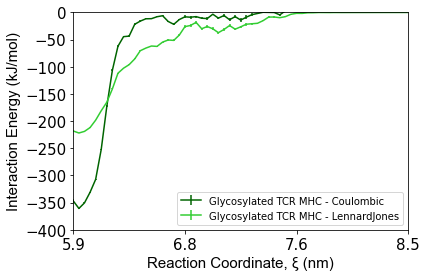

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/var/folders/sl/5t2qrktn4rb09_gfhrrlqc180000gn/T/ipykernel_6148/3355587991.py:74: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/ie_pmf_dg_mhc.png',dpi=300, figsize=(20,20),bbox_inches='tight')


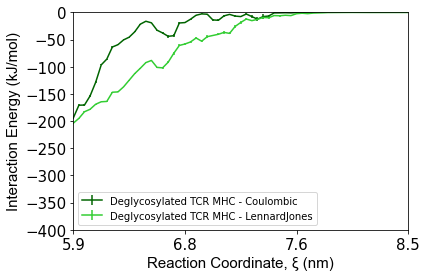

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/var/folders/sl/5t2qrktn4rb09_gfhrrlqc180000gn/T/ipykernel_6148/3355587991.py:102: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will

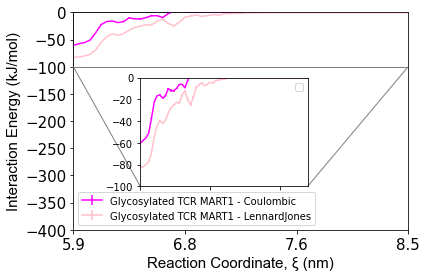

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/var/folders/sl/5t2qrktn4rb09_gfhrrlqc180000gn/T/ipykernel_6148/3355587991.py:129: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will

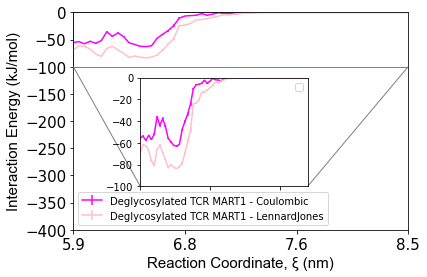

In [4]:
# Import IEx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

df = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/iex.xlsx')
df2 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/iex.xlsx')
df3 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/iex.xlsx')

df4 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/iex.xlsx')
df5 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/iex.xlsx')
df6 = pd.read_excel (r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/iex.xlsx')


#Combine Data

df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)

df4 = df4.append(df5, ignore_index=True)
df4 = df4.append(df6, ignore_index=True)



#Bin IE for Distance
bins=np.linspace(5.884,14.612,200).tolist()
MHCc = df.groupby(pd.cut(df['COM Distance'], bins=bins))['TCR_MHC-Coulombic'].agg(['mean','sem','size'])
MHClj = df.groupby(pd.cut(df['COM Distance'], bins=bins))['TCR_MHC-LennardJones'].agg(['mean','sem','size'])
pepc = df.groupby(pd.cut(df['COM Distance'], bins=bins))['TCR_Peptide_Coulombic'].agg(['mean','sem','size'])
peplj = df.groupby(pd.cut(df['COM Distance'], bins=bins))['TCR_Peptide_LennardJones'].agg(['mean','sem','size'])

MHCc4 = df4.groupby(pd.cut(df4['COM Distance'], bins=bins))['MHC-Coulombic'].agg(['mean','sem','size'])
MHClj4 = df4.groupby(pd.cut(df4['COM Distance'], bins=bins))['MHC-LennardJones'].agg(['mean','sem','size'])
pepc4 = df4.groupby(pd.cut(df4['COM Distance'], bins=bins))['Peptide_Coulombic'].agg(['mean','sem','size'])
peplj4 = df4.groupby(pd.cut(df4['COM Distance'], bins=bins))['Peptide_LennardJones'].agg(['mean','sem','size'])


# Plot IE_X
ax = plt.gca()
MHCc.plot(kind='line', y='mean',yerr='sem', color='darkgreen', use_index=True, ax=ax)
MHClj.plot(kind='line',y='mean',yerr='sem', color='limegreen', use_index=True,ax=ax)


ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 15)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 15)
xticks=bins[::20]
xticks=np.around(xticks,1)
plt.xticks(range(0,len(MHCc),20), xticks, fontsize=15)
plt.yticks(fontsize=15)
ax.legend(['Glycosylated TCR MHC - Coulombic','Glycosylated TCR MHC - LennardJones'])
#ax.set_title('N-Glycosylated TCR-MHC Potential Mean Force', fontname='Arial Black', fontsize= 15)
plt.xlim((0,60))
plt.ylim((-400,0))
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/ie_pmf_g_mhc.png',dpi=300, figsize=(20,20),bbox_inches='tight')
plt.show()

ax = plt.gca()
MHCc4.plot(kind='line',y='mean',yerr='sem', color='darkgreen', use_index=True,ax=ax)
MHClj4.plot(kind='line',y='mean',yerr='sem', color='limegreen', use_index=True,ax=ax)

ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 15)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 15)
xticks=bins[::20]
xticks=np.around(xticks,1)
plt.xticks(range(0,len(MHCc4),20), xticks, fontsize=15)
plt.yticks(fontsize=15)
ax.legend(['Deglycosylated TCR MHC - Coulombic','Deglycosylated TCR MHC - LennardJones'])
#ax.set_title('Deglycosylated TCR-MHC Potential Mean Force', fontname='Arial Black', fontsize= 15)
plt.xlim((0,60))
plt.ylim((-400,0))
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/ie_pmf_dg_mhc.png',dpi=300, figsize=(20,20),bbox_inches='tight')
plt.show()


ax = plt.gca()
pepc.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax)
peplj.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax)

ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 15)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 15)
plt.xticks(range(0,len(MHCc),20), xticks,fontsize=15)
plt.yticks(fontsize=15)
ax.legend(['Glycosylated TCR MART1 - Coulombic','Glycosylated TCR MART1 - LennardJones'])
#ax.set_title('N-Glycosylated TCR-MART1 Potential Mean Force', fontname='Arial Black', fontsize= 15)
plt.xlim((0,60))
plt.ylim((-400,0))

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.2,0.2,0.5,0.5])
ax2.set_axes_locator(ip)
mark_inset(ax, ax2, loc1=3,loc2=4, fc="none",ec='0.5')
pepc.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax2)
peplj.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax2)
ax2.set_xticklabels(['','','','','','','','','','',''])
ax2.set_xlim((0,60))
ax2.set_ylim(-100,0)
ax2.legend([])
ax2.set_xlabel('')
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/ie_pmf_g_pep.png',dpi=300, figsize=(20,20),bbox_inches='tight')
plt.show()

ax = plt.gca()
pepc4.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax)
peplj4.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax)

ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 15)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 15)
plt.xticks(range(0,len(MHCc),20), xticks,fontsize=15)
plt.yticks(fontsize=15)
ax.legend(['Deglycosylated TCR MART1 - Coulombic','Deglycosylated TCR MART1 - LennardJones'])
#ax.set_title('Deglycosylated TCR-MART1 Potential Mean Force', fontname='Arial Black', fontsize= 15)
plt.xlim((0,60))
plt.ylim((-400,0))

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.2,0.2,0.5,0.5])
ax2.set_axes_locator(ip)
mark_inset(ax, ax2, loc1=3,loc2=4, fc="none",ec='0.5')
pepc4.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax2)
peplj4.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax2)
ax2.set_xticklabels(['','','','','','','','','','',''])
ax2.set_xlim((0,60))
ax2.set_ylim(-100,0)
ax2.legend([])
ax2.set_xlabel('')
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/ie_pmf_dg_pep.png',dpi=300, figsize=(20,20),bbox_inches='tight')
plt.show()
